In [3]:
import pandas as pd
import numpy as np
import geopandas as gp
from shapely.geometry import Point
import shapely.wkt
import random
import shapefile

In [109]:
geo_data_path = "/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/all_bay_geodata/"
shapefiles_data_path = "/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/raw_shapefiles/"
bay_county_codes = ['001', '013', '097', '095', '081', '085', '0750', '041', '055']
loan_data = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/parsed_data_1/'

In [110]:
shp = gp.read_file(shapefiles_data_path+"alltracts_shapefiles_2008/tl_2008_06_tract00.shp")
bay = shp[shp['COUNTYFP00'].isin(bay_county_codes)]

In [112]:
sample_loan_data = pd.read_csv(loan_data+"Alameda_2013_parsed.csv")
sample_loan_data

,Tract,Year,County,type,CRA Eligible,"% HI borrower, LI tract","# HI borrower, LI tract","% HI borrower, HI tract","# HI borrower, HI tract","% LI borrower, LI tract","# LI borrower, LI tract","%LI borrower, HI tract","# LI borrower, HI tract",Geoid
0,4001.00,2013,Alameda County,high,not eligible,0.000000,0,0.973684,74,0.000000,0,0.026316,2,6001400100
1,4002.00,2013,Alameda County,high,not eligible,0.000000,0,1.000000,29,0.000000,0,0.000000,0,6001400200
2,4003.00,2013,Alameda County,mid,not eligible,0.000000,0,1.000000,73,0.000000,0,0.000000,0,6001400300
3,4004.00,2013,Alameda County,mid,not eligible,0.000000,0,0.970588,66,0.000000,0,0.029412,2,6001400400
4,4005.00,2013,Alameda County,mod,eligible,0.853659,35,0.000000,0,0.146341,6,0.000000,0,6001400500
5,4006.00,2013,Alameda County,mod,eligible,0.875000,21,0.000000,0,0.125000,3,0.000000,0,6001400600
6,4007.00,2013,Alameda County,mod,eligible,0.860000,86,0.000000,0,0.140000,14,0.000000,0,6001400700
7,4008.00,2013,Alameda County,mod,eligible,0.830508,49,0.000000,0,0.169492,10,0.000000,0,6001400800
8,4009.00,2013,Alameda County,mod,eligible,0.810811,30,0.000000,0,0.189189,7,0.000000,0,6001400900
9,4010.00,2013,Alameda County,mod,eligible,0.807018,92,0.000000,0,0.192982,22,0.000000,0,6001401000


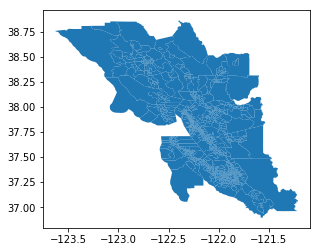

In [101]:
shp_latlon_bounds = pd.merge(bay[['CTIDFP00', 'geometry']], shp.bounds, left_index=True, right_index=True)
shp_latlon_bounds.plot()

In [117]:
def random_points_in_polygon(poly, n):
    '''Poly represents a row of the shapefile. samples n points from a single polygon. Finds a point within the lat and lon bounds and checks if it
    is inside the polygon. If it is it appends it to a list and returns that list.'''
    points = []
    max_lon = poly['maxx']
    min_lat = poly['miny']
    min_lon = poly['minx']
    max_lat = poly['maxy']
    
    while i <= n:
        random_point = Point([random.uniform(min_lon, max_lon), random.uniform(min_lat, max_lat)])
        if (random_point.within(poly.geometry)):
            points.append(random_point)
            i = i+1
        else:
            i=i
            continue
    return random_points
    
#     i= 0
#     while i < n:
#         point = Point(random.uniform(min_lat, max_lat), random.uniform(min_lon, max_lon))
#         if poly.contains(point):
#             poly.append(list(point.coords))
#         i += 1
#     return points  # returns list of lat lon coords due to point.coords call


In [118]:
shp_latlon_bounds.apply(lambda row: random_points_in_polygon(row, 5))

KeyError: ('maxx', 'occurred at index CTIDFP00')

In [103]:

pts_gdf = shp_latlon_bounds.head(50).apply(lambda poly: [random_points_in_polygon(poly) for i in range(5)], axis=1)
# shp_latlon_bounds.to_csv("samplepts.csv")
# pts_gdf = gp.GeoDataFrame()



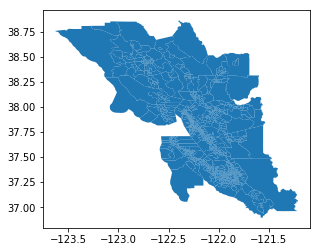

In [104]:
shp_latlon_bounds.plot()
shp_latlon_bounds

In [75]:
import matplotlib.pyplot as plt
points = random_points_in_polygon(10, shp_latlon_bounds[:1])
plt.scatter(points)

here!
POINT (-121.0930115810024 39.3310466288488)
0    False
dtype: bool
POINT (-120.8146929329845 39.26113904391041)
0    False
dtype: bool
POINT (-121.0570575095535 39.26226335675905)
0    False
dtype: bool
POINT (-121.0630752370298 39.31428717883145)
0    False
dtype: bool
POINT (-121.0182353525126 39.28493692014855)
0    True
dtype: bool
POINT (-121.0404709097663 39.34310733539138)
0    False
dtype: bool
POINT (-120.7847616831078 39.26899974166606)
0    False
dtype: bool
POINT (-120.959499668922 39.34688687946207)
0    False
dtype: bool
POINT (-120.8107443112785 39.2886930078509)
0    False
dtype: bool
POINT (-121.01771588798 39.31600408262856)
0    True
dtype: bool


TypeError: scatter() missing 1 required positional argument: 'y'

In [76]:
shp_latlon_bounds.apply(lambda poly: random_points_in_polygon(poly, 40))

TypeError: ("'int' object is not subscriptable", 'occurred at index CTIDFP00')

In [153]:
shapefiles_08 = shapefile.Reader(shapefiles_data_path + "alltracts_shapefiles_2008/tl_2008_06_tract00.shp")
#bay_shapes = shapefiles_08[shapefiles_08["COUNTYFP00"].isin(bay_county_codes)]
# generate 5 points within the first county polygon in geodata
tract_points = {}
for tract, num in zip(shapefiles_08.iterShapes(), np.arange(len(shapefiles_08))):
    #geoid = shapefiles_08.records()[tract][5] # need to get a numerical index here
    tract_points[num] = (random_points_in_polygon(5, tract))
    
#tract_points

In [148]:
# generate 5 points within the first county polygon in geodata
tract_points = {}
for tract, num in zip(shapefiles_08.iterShapes(), np.arange(len(shapefiles_08))):
    #geoid = shapefiles_08.records()[tract][5] # need to get a numerical index here
    tract_points[num] = (random_points_in_polygon(5, tract))

TypeError: 'generator' object is not subscriptable

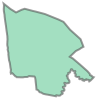

In [35]:
P = shapely.wkt.loads(al_08['geometry'].iloc[0])
P

In [36]:
tract_points = {}
for tract in al_08.itertuples():
    geoid = tract.CTIDFP00
    #num_HI_b = tract["# HI borrower, HI tract"]+tract["# HI borrower, HI tract"]
#     print(tract.geometry, type(tract.geometry))
    tract_points[geoid] = (random_points_in_polygon(5, shapely.wkt.loads(tract.geometry)))
    
tract_points

{6001400100: [[(-122.22406205771036, 37.87786779276943)],
  [(-122.21783928703532, 37.87071072114206)],
  [(-122.22966437435352, 37.87725516559781)],
  [(-122.23338098261182, 37.85339358628094)],
  [(-122.22573728097701, 37.860677402557684)]],
 6001400200: [[(-122.24989194736038, 37.848097393426364)],
  [(-122.25330909936646, 37.84617375921475)],
  [(-122.25069346809063, 37.85019054289015)],
  [(-122.25129530041853, 37.847924834733135)],
  [(-122.25501972843259, 37.84573438315977)]],
 6001400300: [[(-122.26086947330741, 37.838028269579965)],
  [(-122.24982130465541, 37.84049680377913)],
  [(-122.25997695883102, 37.83741605857341)],
  [(-122.2465482333987, 37.84478895233208)],
  [(-122.26206776303391, 37.838332306643565)]],
 6001400400: [[(-122.25718914256448, 37.85078438099467)],
  [(-122.2561049879526, 37.85111850734975)],
  [(-122.26027525346456, 37.84232222512175)],
  [(-122.25547095077599, 37.847662967654124)],
  [(-122.25842859131275, 37.84450276388452)]],
 6001400500: [[(-122.266